In [1]:
%env CONSOLE_WIDTH=140

from kiara.interfaces.python_api.workflow import Workflow
from kiara.utils.jupyter import graph_to_image
from kiara.utils.cli import terminal_print_model

env: CONSOLE_WIDTH=140


# Creating the workflow object <a class="anchor" id="create_workflow_obj"></a>

As the first step we create a [`Workflow`](https://dharpa.org/kiara/latest/reference/kiara/interfaces/python_api/workflow/) object, which is a convenience class that manages workflow state, internal consistency and history for us:

In [2]:
doc = """Onboard network data"""
workflow = Workflow.create("create_network_graph", doc=doc, replace_existing_alias=True)

# Assembling the workflow <a class="anchor" id="assembly"></a>

The first step in the creation of our workflow is to create the individual steps from the available *kiara* modules.

A list of available modules and their aliases can be found here: TODO

## Creating the steps of the workflow <a class="anchor" id="creating_steps"></a>

In [3]:
# Creating step: import_edges_file
workflow.add_step(operation="import.file", step_id="import_edges_file")

╭─ Step: import_edges_file ────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       import_edges_file                                                                                                        │
│   module type   import.file                                                                                                              │
│   module doc    Import a file from the local filesystem.                                                                                 │
│   inputs                                                                                                                                 │
│                   field name               type     description                                          Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   import_edges_file.path   string   The local path to the file.                          yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name               type   description                                                                            │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   import_edges_file.file   file   The loaded files.                                                                      │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [4]:
# Creating step: import_nodes_file
workflow.add_step(operation="import.file", step_id="import_nodes_file")

╭─ Step: import_nodes_file ────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       import_nodes_file                                                                                                        │
│   module type   import.file                                                                                                              │
│   module doc    Import a file from the local filesystem.                                                                                 │
│   inputs                                                                                                                                 │
│                   field name               type     description                                          Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   import_nodes_file.path   string   The local path to the file.                          yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name               type   description                                                                            │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   import_nodes_file.file   file   The loaded files.                                                                      │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [5]:
# Creating step: create_edges_table
step_create_edges_table_config = {'constants': {}, 'defaults': {}, 'source_type': 'csv_file', 'target_type': 'table', 'ignore_errors': False}
workflow.add_step(
    operation="create.table",
    module_config=step_create_edges_table_config,
    step_id="create_edges_table")

╭─ Step: create_edges_table ───────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id         create_edges_table                                                                                                     │
│   module type     create.table                                                                                                           │
│   module_config   {                                                                                                                      │
│                     "source_type": "csv_file",                                                                                           │
│                     "target_type": "table",                                                                                              │
│                     "ignore_errors": false                                                                                               │
│                   }                                                                                                                      │
│   module doc      -- n/a --                                                                                                              │
│   inputs                                                                                                                                 │
│                     field name                    type       description                                 Required   Default              │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     create_edges_table.csv_file   csv_file   The type of the source value.               yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                     field name                 type    description                                                                       │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     create_edges_table.table   table   The result value.                                                                 │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [6]:
# Connecting input(s) of step 'create_edges_table'
workflow.connect_fields("create_edges_table.csv_file", "import_edges_file.file")

In [7]:
# Creating step: create_nodes_table
step_create_nodes_table_config = {'constants': {}, 'defaults': {}, 'source_type': 'csv_file', 'target_type': 'table', 'ignore_errors': False}
workflow.add_step(
    operation="create.table",
    module_config=step_create_nodes_table_config,
    step_id="create_nodes_table")

╭─ Step: create_nodes_table ───────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id         create_nodes_table                                                                                                     │
│   module type     create.table                                                                                                           │
│   module_config   {                                                                                                                      │
│                     "source_type": "csv_file",                                                                                           │
│                     "target_type": "table",                                                                                              │
│                     "ignore_errors": false                                                                                               │
│                   }                                                                                                                      │
│   module doc      -- n/a --                                                                                                              │
│   inputs                                                                                                                                 │
│                     field name                    type       description                                 Required   Default              │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     create_nodes_table.csv_file   csv_file   The type of the source value.               yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                     field name                 type    description                                                                       │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     create_nodes_table.table   table   The result value.                                                                 │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [8]:
# Connecting input(s) of step 'create_nodes_table'
workflow.connect_fields("create_nodes_table.csv_file", "import_nodes_file.file")

In [9]:
# Creating step: assemble_network_data
workflow.add_step(operation="create.network_data.from.tables", step_id="assemble_network_data")

╭─ Step: assemble_network_data ────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       assemble_network_data                                                                                                    │
│   module type   create.network_data.from.tables                                                                                          │
│   module doc    Create a graph object from one or two tables.                                                                            │
│                                                                                                                                          │
│                 This module needs at least one table as input, providing the edges of the resulting network data set. If no further      │
│                 table is created, basic node information will be automatically created by using unique values from the edges source      │
│                 and target columns.                                                                                                      │
│   inputs                                                                                                                                 │
│                   field name                             type     description                            Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   assemble_network_data.edges            table    A table that contains the edges        yes        -- no default --     │
│                                                                   data.                                                                  │
│                   assemble_network_data.source_column_   string   The name of the source column name     no         source               │
│                   name                                            in the edges table.                                                    │
│                   assemble_network_data.target_column_   string   The name of the target column name     no         target               │
│                   name                                            in the edges table.                                                    │
│                   assemble_network_data.edges_column_m   dict     An optional map of original column     no         -- no default --     │
│                   ap                                              name to desired.                                                       │
│                   assemble_network_data.nodes            table    A table that contains the nodes        no         -- no default --     │
│                                                                   data.                                                                  │
│                   assemble_network_data.id_column_name   string   The name (before any potential         no         id                   │
│                                                                   column mapping) of the node-table                                      │
│                                                                   column that contains the node                                          │
│                                                                   identifier (used in the edges                                          │
│                                                                   table).                                                                │
│                   assemble_network_data.label_column_n   string   The name of a column that contains     no         -- no default --     │
│                   ame                             

In [10]:
# Connecting input(s) of step 'assemble_network_data'
workflow.connect_fields("assemble_network_data.edges", "create_edges_table.table")
workflow.connect_fields("assemble_network_data.nodes", "create_nodes_table.table")

## Setting workflow input/output names (optional)

To make our workflow nicer to use, we can set aliases for its inputs and outputs.

In [11]:
workflow.set_input_alias(input_field="import_edges_file.path", alias="edges_file")
workflow.set_input_alias(input_field="import_nodes_file.path", alias="nodes_file")
workflow.set_input_alias(input_field="assemble_network_data.source_column_name", alias="source_column_name")
workflow.set_input_alias(input_field="assemble_network_data.target_column_name", alias="target_column_name")
workflow.set_input_alias(input_field="assemble_network_data.edges_column_map", alias="edges_column_map")
workflow.set_input_alias(input_field="assemble_network_data.id_column_name", alias="id_column_name")
workflow.set_input_alias(input_field="assemble_network_data.label_column_name", alias="label_column_name")
workflow.set_input_alias(input_field="assemble_network_data.nodes_column_map", alias="nodes_column_map")


workflow.set_output_alias(output_field="assemble_network_data.network_data", alias="network_data")

# Workflow information <a class="anchor" id="pipeline_info"></a>

After our workflow is wired up, we look can look at its structure, and other properties.


## Workflow status

A workflow consists of a series of 'states', the most relevant is always the most recent one. We can investigate
that latest states details like so:

In [12]:
workflow.current_state

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuB1NTxEXpFzjgz772ayqRxbPvNgfmPLACvD9AiVjNTpN6A                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name                                  status    required   default   value id                                  │
│                    ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────     │
│                     import_edges_file__path                     not set   yes                  00000000-0000-0000-0000-000000000001      │
│                     import_nodes_file__path                     not set   yes                  00000000-0000-0000-0000-000000000001      │
│                     assemble_network_data__edges_column_map     valid     no                   00000000-0000-0000-0000-000000000001      │
│                     assemble_network_data__id_column_name       valid     no         id        00000000-0000-0000-0000-000000000001      │
│                     assemble_network_data__label_column_name    valid     no                   00000000-0000-0000-0000-000000000001      │
│                     assemble_network_data__nodes_column_map     valid     no                   00000000-0000-0000-0000-000000000001      │
│                     assemble_network_data__source_column_name   valid     no         source    00000000-0000-0000-0000-000000000001      │
│                     assemble_network_data__target_column_name   valid     no         target    00000000-0000-0000-0000-000000000001      │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: import_edges_file                                                                                        │
│                   │   │   └── status: inputs invalid                                                                                     │
│                   │   │       └── path: not set                                                                                          │
│                   │   └── step: import_nodes_file                                                                                        │
│                   │       └── status: inputs invalid                                                                                     │
│                   │           └── path: not set                                                                                          │
│                   ├── stage: 2                                                                                                           │
│                   │   ├── step: create_edges_table                                                                                       │
│                   │   │   └── status: inputs invalid                                                                                     │
│                   │   │       └── csv_file: not set                                                                                      │
│                   │   └── step: create_nodes_table                                                                                       │
│                   │       └── status: inputs inval

## Pipeline execution graph

Let's look at the current execution graph for the current workflow pipeline:

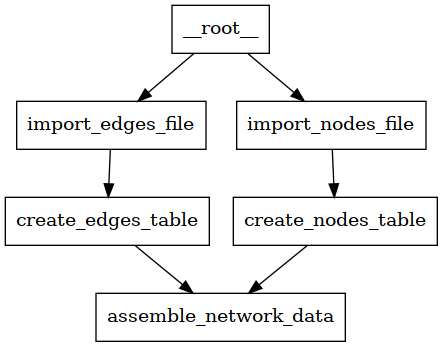

In [13]:
graph_to_image(workflow.pipeline.execution_graph)

# Workflow inputs <a class="anchor" id="pipeline_inputs"></a>

Once a workflow has an assembled pipeline, we can set it's inputs. We use the input field
names that we got from the result of the `workflow.current_state` call.

In [14]:
workflow.set_input("edges_file", "/home/markus/projects/kiara/dev/kiara.examples/examples/pipelines/network_analysis/../../data/journals/JournalEdges1902.csv")
workflow.set_input("nodes_file", "/home/markus/projects/kiara/dev/kiara.examples/examples/pipelines/network_analysis/../../data/journals/JournalNodes1902.csv")
workflow.set_input("source_column_name", "Source")
workflow.set_input("target_column_name", "Target")
workflow.set_input("edges_column_map", None)
workflow.set_input("id_column_name", "Id")
workflow.set_input("label_column_name", "Label")
workflow.set_input("nodes_column_map", None)


# process all workflow steps that can be processed
workflow.process_steps()

# print the current state, after we set our inputs
workflow.current_state

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuAq6TekecFhiwafr66P1QzuUq4xXEdgDGkSUSsr2mbfEdd                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name                                  status   required   default   value id                                   │
│                    ────────────────────────────────────────────────────────────────────────────────────────────────────────────────      │
│                     import_edges_file__path                     valid    yes                  e1e0189a-60de-42d7-84d8-f23ffa3d4ed4       │
│                     import_nodes_file__path                     valid    yes                  c660be5d-9522-42aa-96d7-43a66598f7e1       │
│                     assemble_network_data__edges_column_map     valid    no                   00000000-0000-0000-0000-000000000002       │
│                     assemble_network_data__id_column_name       valid    no         id        950265d0-c073-4027-bfd1-dcb8958b41a1       │
│                     assemble_network_data__label_column_name    valid    no                   3ec3196a-db51-4ff2-a9ee-91a1b635b75f       │
│                     assemble_network_data__nodes_column_map     valid    no                   00000000-0000-0000-0000-000000000002       │
│                     assemble_network_data__source_column_name   valid    no         source    6a12e03a-8db1-4ae6-bb95-01cb273f7095       │
│                     assemble_network_data__target_column_name   valid    no         target    76fea038-6171-4579-9edf-a3a4c4cc4655       │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: import_edges_file                                                                                        │
│                   │   │   └── status: results ready                                                                                      │
│                   │   └── step: import_nodes_file                                                                                        │
│                   │       └── status: results ready                                                                                      │
│                   ├── stage: 2                                                                                                           │
│                   │   ├── step: create_edges_table                                                                                       │
│                   │   │   └── status: results ready                                                                                      │
│                   │   └── step: create_nodes_table                                                                                       │
│                   │       └── status: results ready                                                                                      │
│                   └── stage: 3                                                                                                           │
│                       └── step: assemble_network_data                                                                                    │
│                           └── status: results read

# Workflow outputs <a class="anchor" id="pipeline_outputs"></a>

To print the actual data of the workflows' current outputs, we call the `current_output_values` property of the workflow object:

In [15]:
workflow.current_output_values

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   network_data                                                                                                                           │
│                  Table: edges                                                                                                            │
│                                                                                                                                          │
│                    source   target   weight                                                                                              │
│                   ──────────────────────────                                                                                             │
│                    1        1        11                                                                                                  │
│                    1        5        1                                                                                                   │
│                    1        7        6                                                                                                   │
│                    1        8        15                                                                                                  │
│                    1        10       24                                                                                                  │
│                    1        13       1                                                                                                   │
│                    1        14       2                                                                                                   │
│                    1        15       8                                                                                                   │
│                    1        18       7                                                                                                   │
│                    1        20       48                                                                                                  │
│                    1        21       7                                                                                                   │
│                    1        22       4                                                                                                   │
│                    1        23       75                                                                                                  │
│                    1        24       1                                                                                                   │
│                    1        26       8                                                                                                   │
│                    1        29       1                                                                                                   │
│                    ...      ...      ...                                                                                                 │
│                    ...      ...      ...                                                                                                 │
│                    51       108      1                                                                                                   │
│                    51       109      5            

# Workflow snapshot <a class="anchor" id="snapshot"></a>

So far, our workflow only exists in memory. If we want to save it so we can have a look at it again at a later stage, we can snapshot the current state, which will save the current structure of the internal pipeline, as well as all inputs that are currently used. In addition, this will register the workflow under the alias we specified on top of this file when creating the `Workflow` object (in our case: `create_network_graph`).

If we would not not specify `save=True`, the structure of the pipeline and inputs would still be frozen and kept, but only in memory, and we'd only be able to access it in our current session.

In [16]:
workflow.snapshot(save=True)

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuAq6TekecFhiwafr66P1QzuUq4xXEdgDGkSUSsr2mbfEdd                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name                                  status   required   default   value id                                   │
│                    ────────────────────────────────────────────────────────────────────────────────────────────────────────────────      │
│                     import_edges_file__path                     valid    yes                  e1e0189a-60de-42d7-84d8-f23ffa3d4ed4       │
│                     import_nodes_file__path                     valid    yes                  c660be5d-9522-42aa-96d7-43a66598f7e1       │
│                     assemble_network_data__edges_column_map     valid    no                   00000000-0000-0000-0000-000000000002       │
│                     assemble_network_data__id_column_name       valid    no         id        950265d0-c073-4027-bfd1-dcb8958b41a1       │
│                     assemble_network_data__label_column_name    valid    no                   3ec3196a-db51-4ff2-a9ee-91a1b635b75f       │
│                     assemble_network_data__nodes_column_map     valid    no                   00000000-0000-0000-0000-000000000002       │
│                     assemble_network_data__source_column_name   valid    no         source    6a12e03a-8db1-4ae6-bb95-01cb273f7095       │
│                     assemble_network_data__target_column_name   valid    no         target    76fea038-6171-4579-9edf-a3a4c4cc4655       │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: import_edges_file                                                                                        │
│                   │   │   └── status: results ready                                                                                      │
│                   │   └── step: import_nodes_file                                                                                        │
│                   │       └── status: results ready                                                                                      │
│                   ├── stage: 2                                                                                                           │
│                   │   ├── step: create_edges_table                                                                                       │
│                   │   │   └── status: results ready                                                                                      │
│                   │   └── step: create_nodes_table                                                                                       │
│                   │       └── status: results ready                                                                                      │
│                   └── stage: 3                                                                                                           │
│                       └── step: assemble_network_data                                                                                    │
│                           └── status: results read

Now, we can access our workflow in other environments, for example from the commandline:

In [17]:
! kiara workflow list


                                                                                                                                            
  alias(es)              workflow_id                            # steps   # stages   # states   description                                 
 ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  create_network_graph   f6618973-5866-4128-b6cc-bef24d50fb72   5         3          1          Onboard network data                        
  topic_modeling         1189a392-ac87-4cc8-a14e-9ee88bf8ec50   9         6          1          Example topic-modeling end-to-end           
                                                                                                workflow.                                   
                                                                                                                                            


In [18]:
! kiara workflow explain create_network_graph

╭─ Workflow: create_network_graph ─────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  documentation                                                                                                                           │
│                          Onboard network data                                                                                            │
│                                                                                                                                          │
│  author(s)                                                                                                                               │
│                                                                                                                                          │
│  workflow i